# Population Density

In [38]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point


Clean up the csv

In [39]:
age = pd.read_excel('../Data/Census_2023_MedianAgeEstimates_forVA.xlsx', skiprows = 5)

In [40]:
age.head()

,Locality,FIPS Code,Both Sexes,Male,Female
0,Accomack County,1,47.6,45.3,49.4
1,Albemarle County,3,40.3,39.1,41.5
2,Alleghany County,5,49.1,47.4,50.7
3,Amelia County,7,44.2,42.8,45.7
4,Amherst County,9,43.8,42.6,44.9


In [41]:
gdf = gpd.read_file('../Data/VA_Jurisdictions/VA_Jurisdictions.shp')
gdf.head()

     OBJECTID     GNIS            NAME               NAMELSAD GSOURCE LADOPT  \
0           1  1674630      Montgomery      Montgomery County       L      Y   
1           2  1497573         Russell         Russell County       V      N   
2           3  1502770           Henry           Henry County       T      N   
3           4  1480136  King and Queen  King and Queen County       T      N   
4           5  1494354           Floyd           Floyd County       V      N   
..        ...      ...             ...                    ...     ...    ...   
319       320  2391276    Lovettsville      Lovettsville town       L      Y   
320       321  2390731      Blacksburg        Blacksburg town       L      Y   
321       322  2391279           Luray             Luray town       L      Y   
322       323  2390226        Hamilton          Hamilton town       L      Y   
323       324  2390796       Claremont         Claremont town       L      Y   

       AREASQMI LASTUPDATE JURISTYPE ST

In [42]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace('city', '')
    name = name.replace('town of ', '')
    name = name.replace('town', '')
    return name

age['Locality'] = age['Locality'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [46]:
merged_gdf = age.merge(gdf, left_on="Locality", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['Locality'])
merged_gdf

,Locality,FIPS Code,Both Sexes,Male,Female,OBJECTID,GNIS,NAME,NAMELSAD,GSOURCE,...,CODE_DISTR,DISTRICT,CLASS_FP,VDOT_CODE,JURIS_CODE,RNS_FIPS_C,AMS_FIPS_C,Shape__Are,Shape__Len,geometry
0,montgomery county,121.0,30.6,28.3,33.2,1,1674630,Montgomery,montgomery county,L,...,2,Salem,H1,060,060,060,121,1.591074e+09,238285.910698,"MULTIPOLYGON (((-8941584.662 4490539.094, -894..."
1,russell county,167.0,46.5,45.0,47.9,2,1497573,Russell,russell county,V,...,1,Bristol,H1,083,083,083,167,1.935060e+09,250387.957924,"POLYGON ((-9103768.661 4433341.817, -9103809.2..."
2,henry county,89.0,47.6,45.9,49.2,3,1502770,Henry,henry county,T,...,2,Salem,H1,044,044,044,089,1.550971e+09,227443.648406,"POLYGON ((-8866137.692 4416041.284, -8866198.0..."
3,king and queen county,97.0,48.8,47.3,50.1,4,1480136,King and Queen,king and queen county,T,...,6,Fredericksburg,H1,049,049,049,097,1.353238e+09,298730.097281,"POLYGON ((-8533092.708 4523518.287, -8533094.4..."
4,floyd county,63.0,48.2,47.5,48.9,5,1494354,Floyd,floyd county,V,...,2,Salem,H1,031,031,031,063,1.550250e+09,234994.467427,"POLYGON ((-8919821.406 4456253.01, -8919740.25..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,galax,640.0,37.7,35.8,39.7,129,1498426,Galax,galax,L,...,2,Salem,C7,113,113,113,640,3.442897e+07,39550.351956,"POLYGON ((-9004748.107 4396809.71, -9004585.69..."
129,manassas park,685.0,36.5,36.6,36.3,130,1498431,Manassas Park,manassas park,L,...,9,Northern Virginia,C7,152,152,152,685,1.292172e+07,28873.861605,"MULTIPOLYGON (((-8623926.68 4691375.435, -8623..."
130,prince william county,153.0,36.6,35.9,37.3,131,1480161,Prince William,prince william county,L,...,9,Northern Virginia,H1,076,076,076,153,1.478571e+09,294991.359628,"MULTIPOLYGON (((-8643098.151 4713476.58, -8643..."
131,goochland county,75.0,50.4,49.0,51.5,132,1674271,Goochland,goochland county,L,...,4,Richmond,H1,037,037,037,075,1.204904e+09,214765.311631,"POLYGON ((-8689152.949 4565886.216, -8689108.7..."


In [50]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

<Axes: >

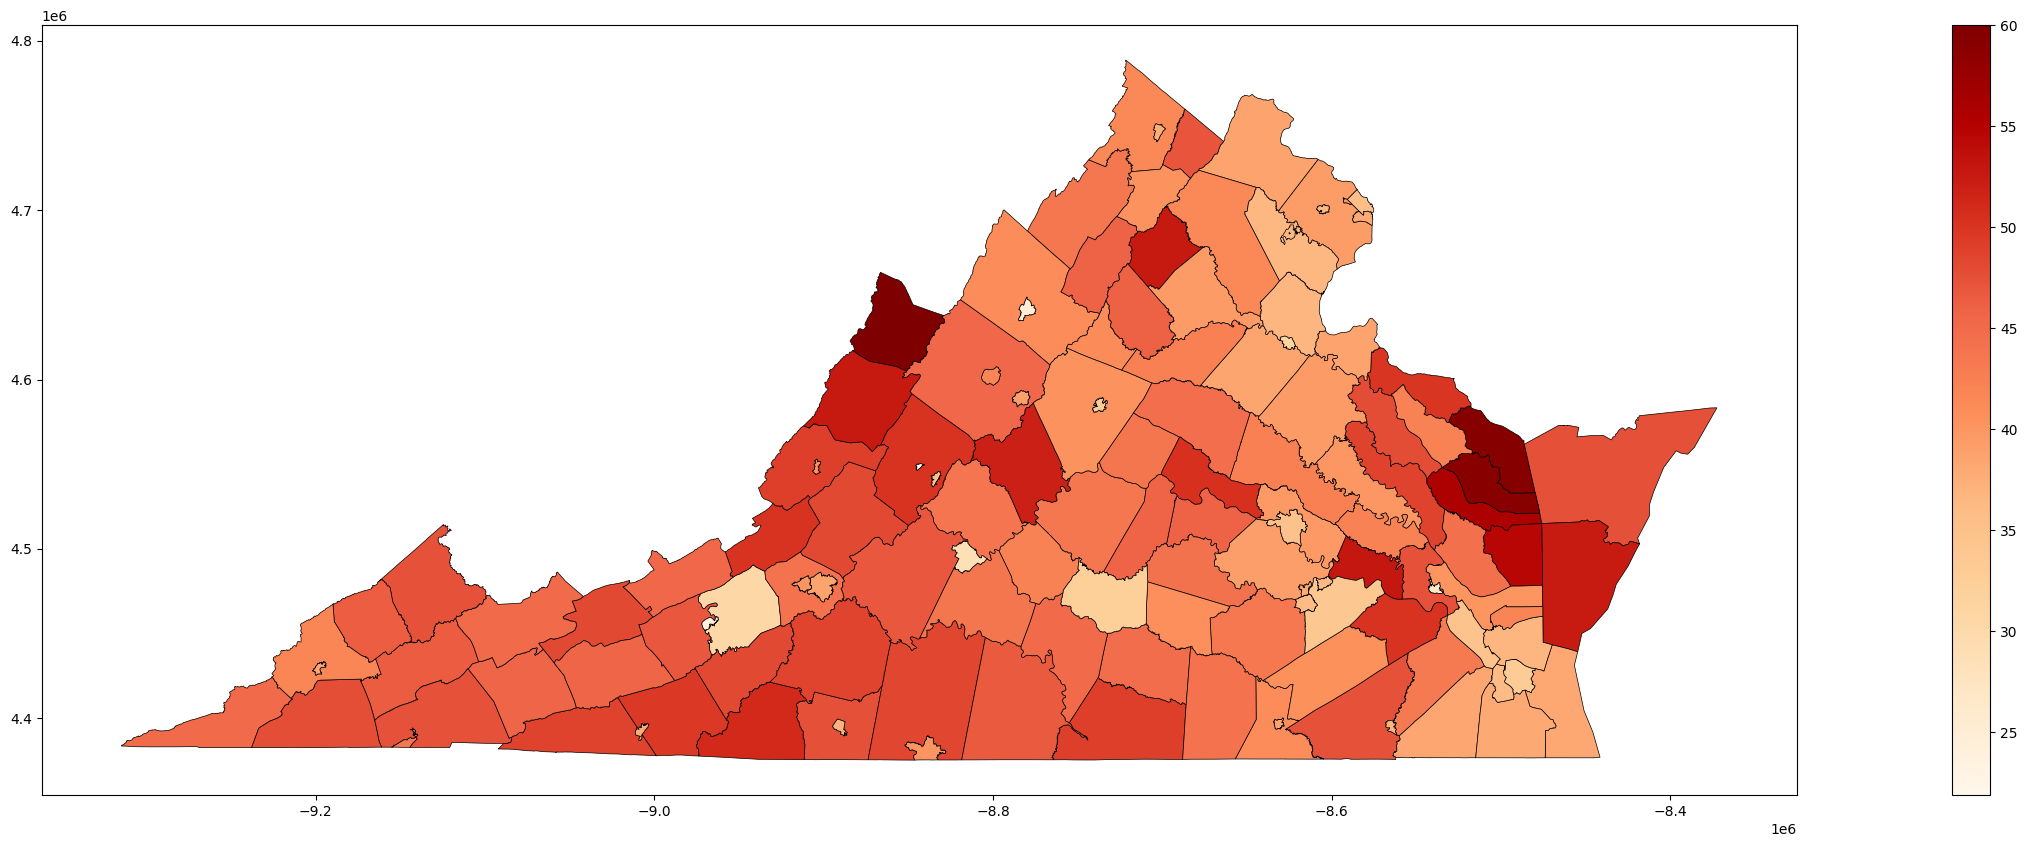

In [51]:
fig, ax = plt.subplots(figsize=(40, 10))
merged_gdf.plot(
    column='Both Sexes',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)